In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
from seaborn import histplot
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [9]:
new_data =pd.read_csv('C:/New folder/DataSet/winequality-white.csv')

In [10]:
new_data.shape

(4898, 12)

In [11]:
new_data.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [12]:
new_data.isnull().sum().sum

<bound method Series.sum of fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64>

In [13]:
df_white=new_data

In [14]:
 df_white['quality'] = np.where((df_white['quality']<=5),1,2)
 df_white['quality'] = df_white['quality'].map({1:'Bad', 2:'Good'})

In [15]:
 df_white.tail(4)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality  
4894      9.6     Bad  
4895      9.4    Good  
4896     12.8    Good  
4897     11.8    Good

In [16]:
 df_white.quality.value_counts()

quality
Good    3258
Bad     1640
Name: count, dtype: int64

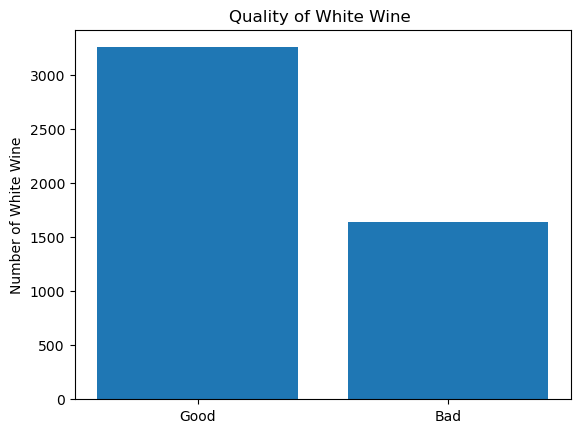

In [18]:
# Bar diagram
objects = ('Good', 'Bad')
x_pos = np.arange(len(objects))
quality_fre=[3259, 1643] 
plt.bar(x_pos, quality_fre)
plt.xticks(x_pos, objects)
plt.ylabel('Number of White Wine')
plt.title('Quality of White Wine ')
plt.show()

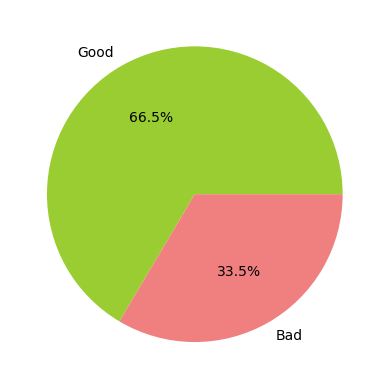

In [19]:
# Pie Chart
quality_fre=[3259, 1643] 
plt.pie(quality_fre, labels=['Good', 'Bad'], colors=['yellowgreen', 'lightcoral'],  autopct='%.1f%%')
plt.show()

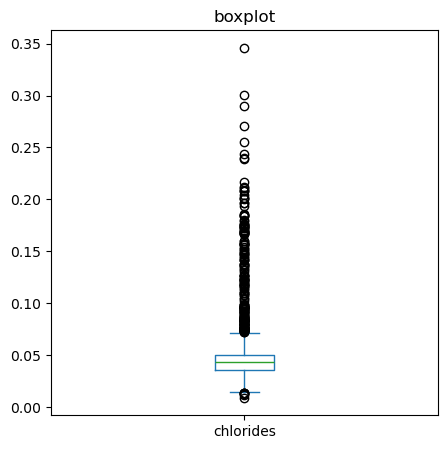

In [20]:
ax = df_white[['chlorides']].plot(kind='box', title='boxplot',figsize =(5, 5))
plt.show()

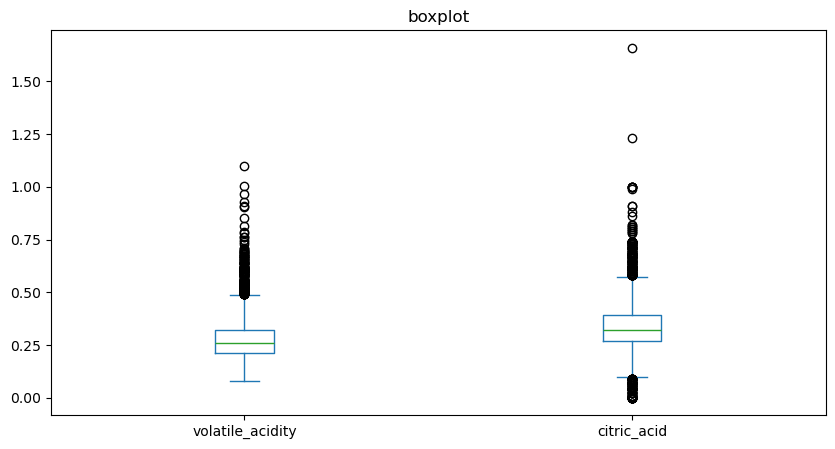

In [21]:
ax = df_white[['volatile_acidity', 'citric_acid']].plot(kind='box', title='boxplot',figsize =(10, 5))
plt.show()

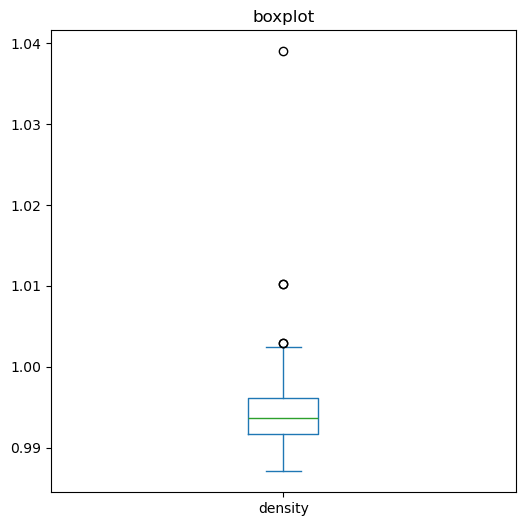

In [22]:
ax = df_white[['density']].plot(kind='box', title='boxplot',figsize =(6, 6))
plt.show()

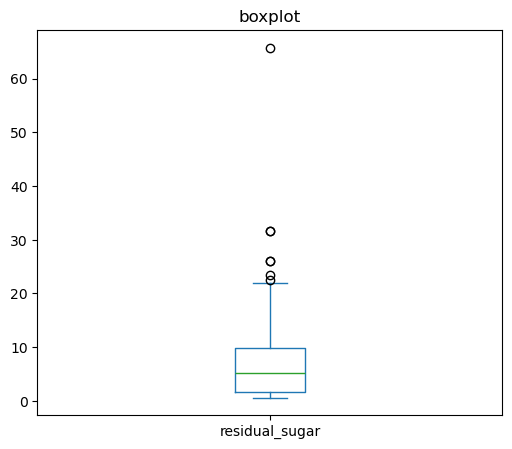

In [23]:
ax = df_white[['residual_sugar']].plot(kind='box', title='boxplot',figsize =(6, 5))
plt.show()

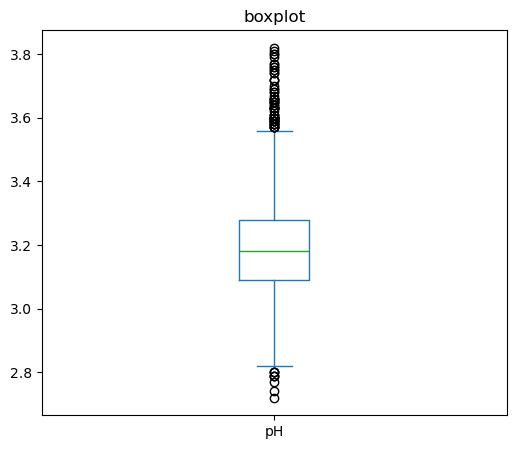

In [24]:
ax = df_white[['pH']].plot(kind='box', title='boxplot',figsize =(6, 5))
plt.show()

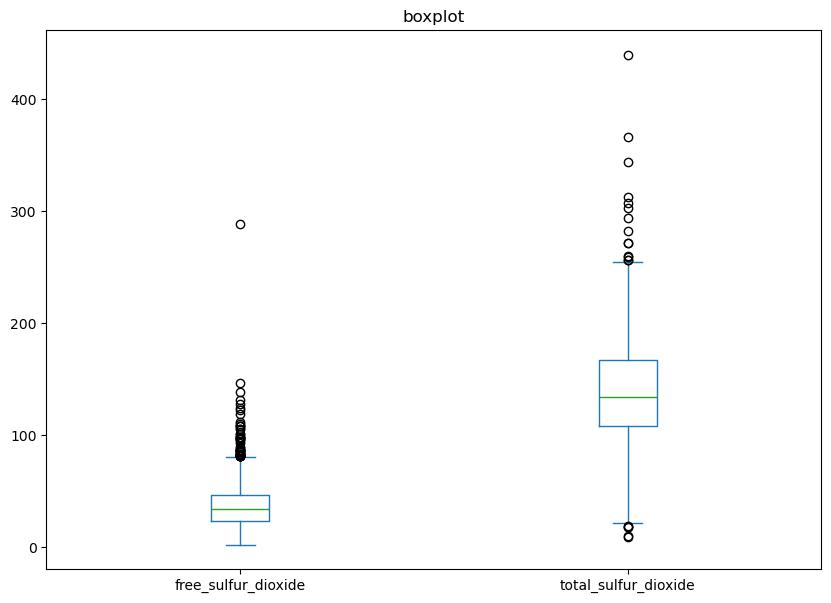

In [25]:
ax = df_white[['free_sulfur_dioxide','total_sulfur_dioxide']].plot(kind='box', title='boxplot',figsize =(10, 7))
plt.show()

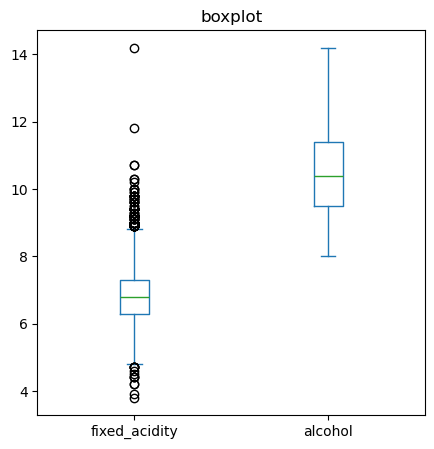

In [27]:
ax = df_white[['fixed_acidity','alcohol']].plot(kind='box', title='boxplot',figsize =(5, 5))
plt.show()

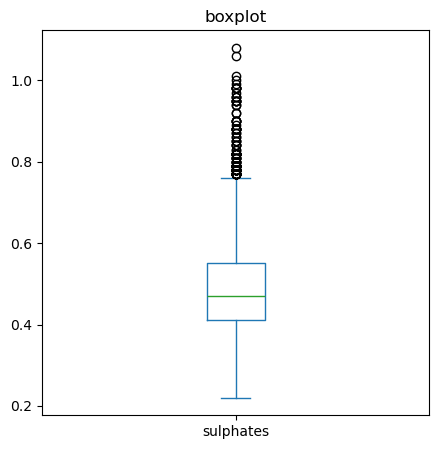

In [28]:
ax = df_white[['sulphates']].plot(kind='box', title='boxplot',figsize =(5, 5))
plt.show()

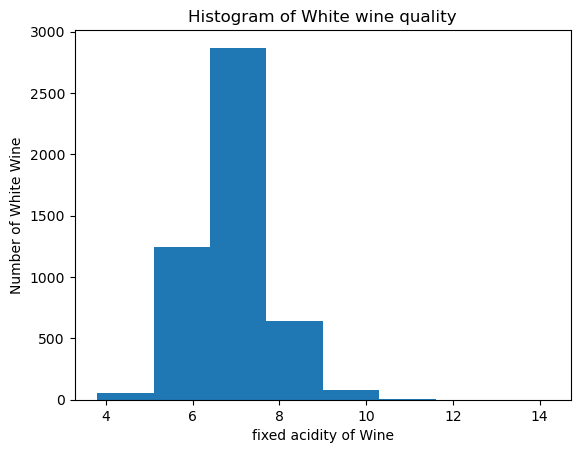

In [29]:
plt.hist(df_white.fixed_acidity, bins=8)
plt.xlabel('fixed acidity of Wine')
plt.ylabel('Number of White Wine')
plt.title('Histogram of White wine quality')
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

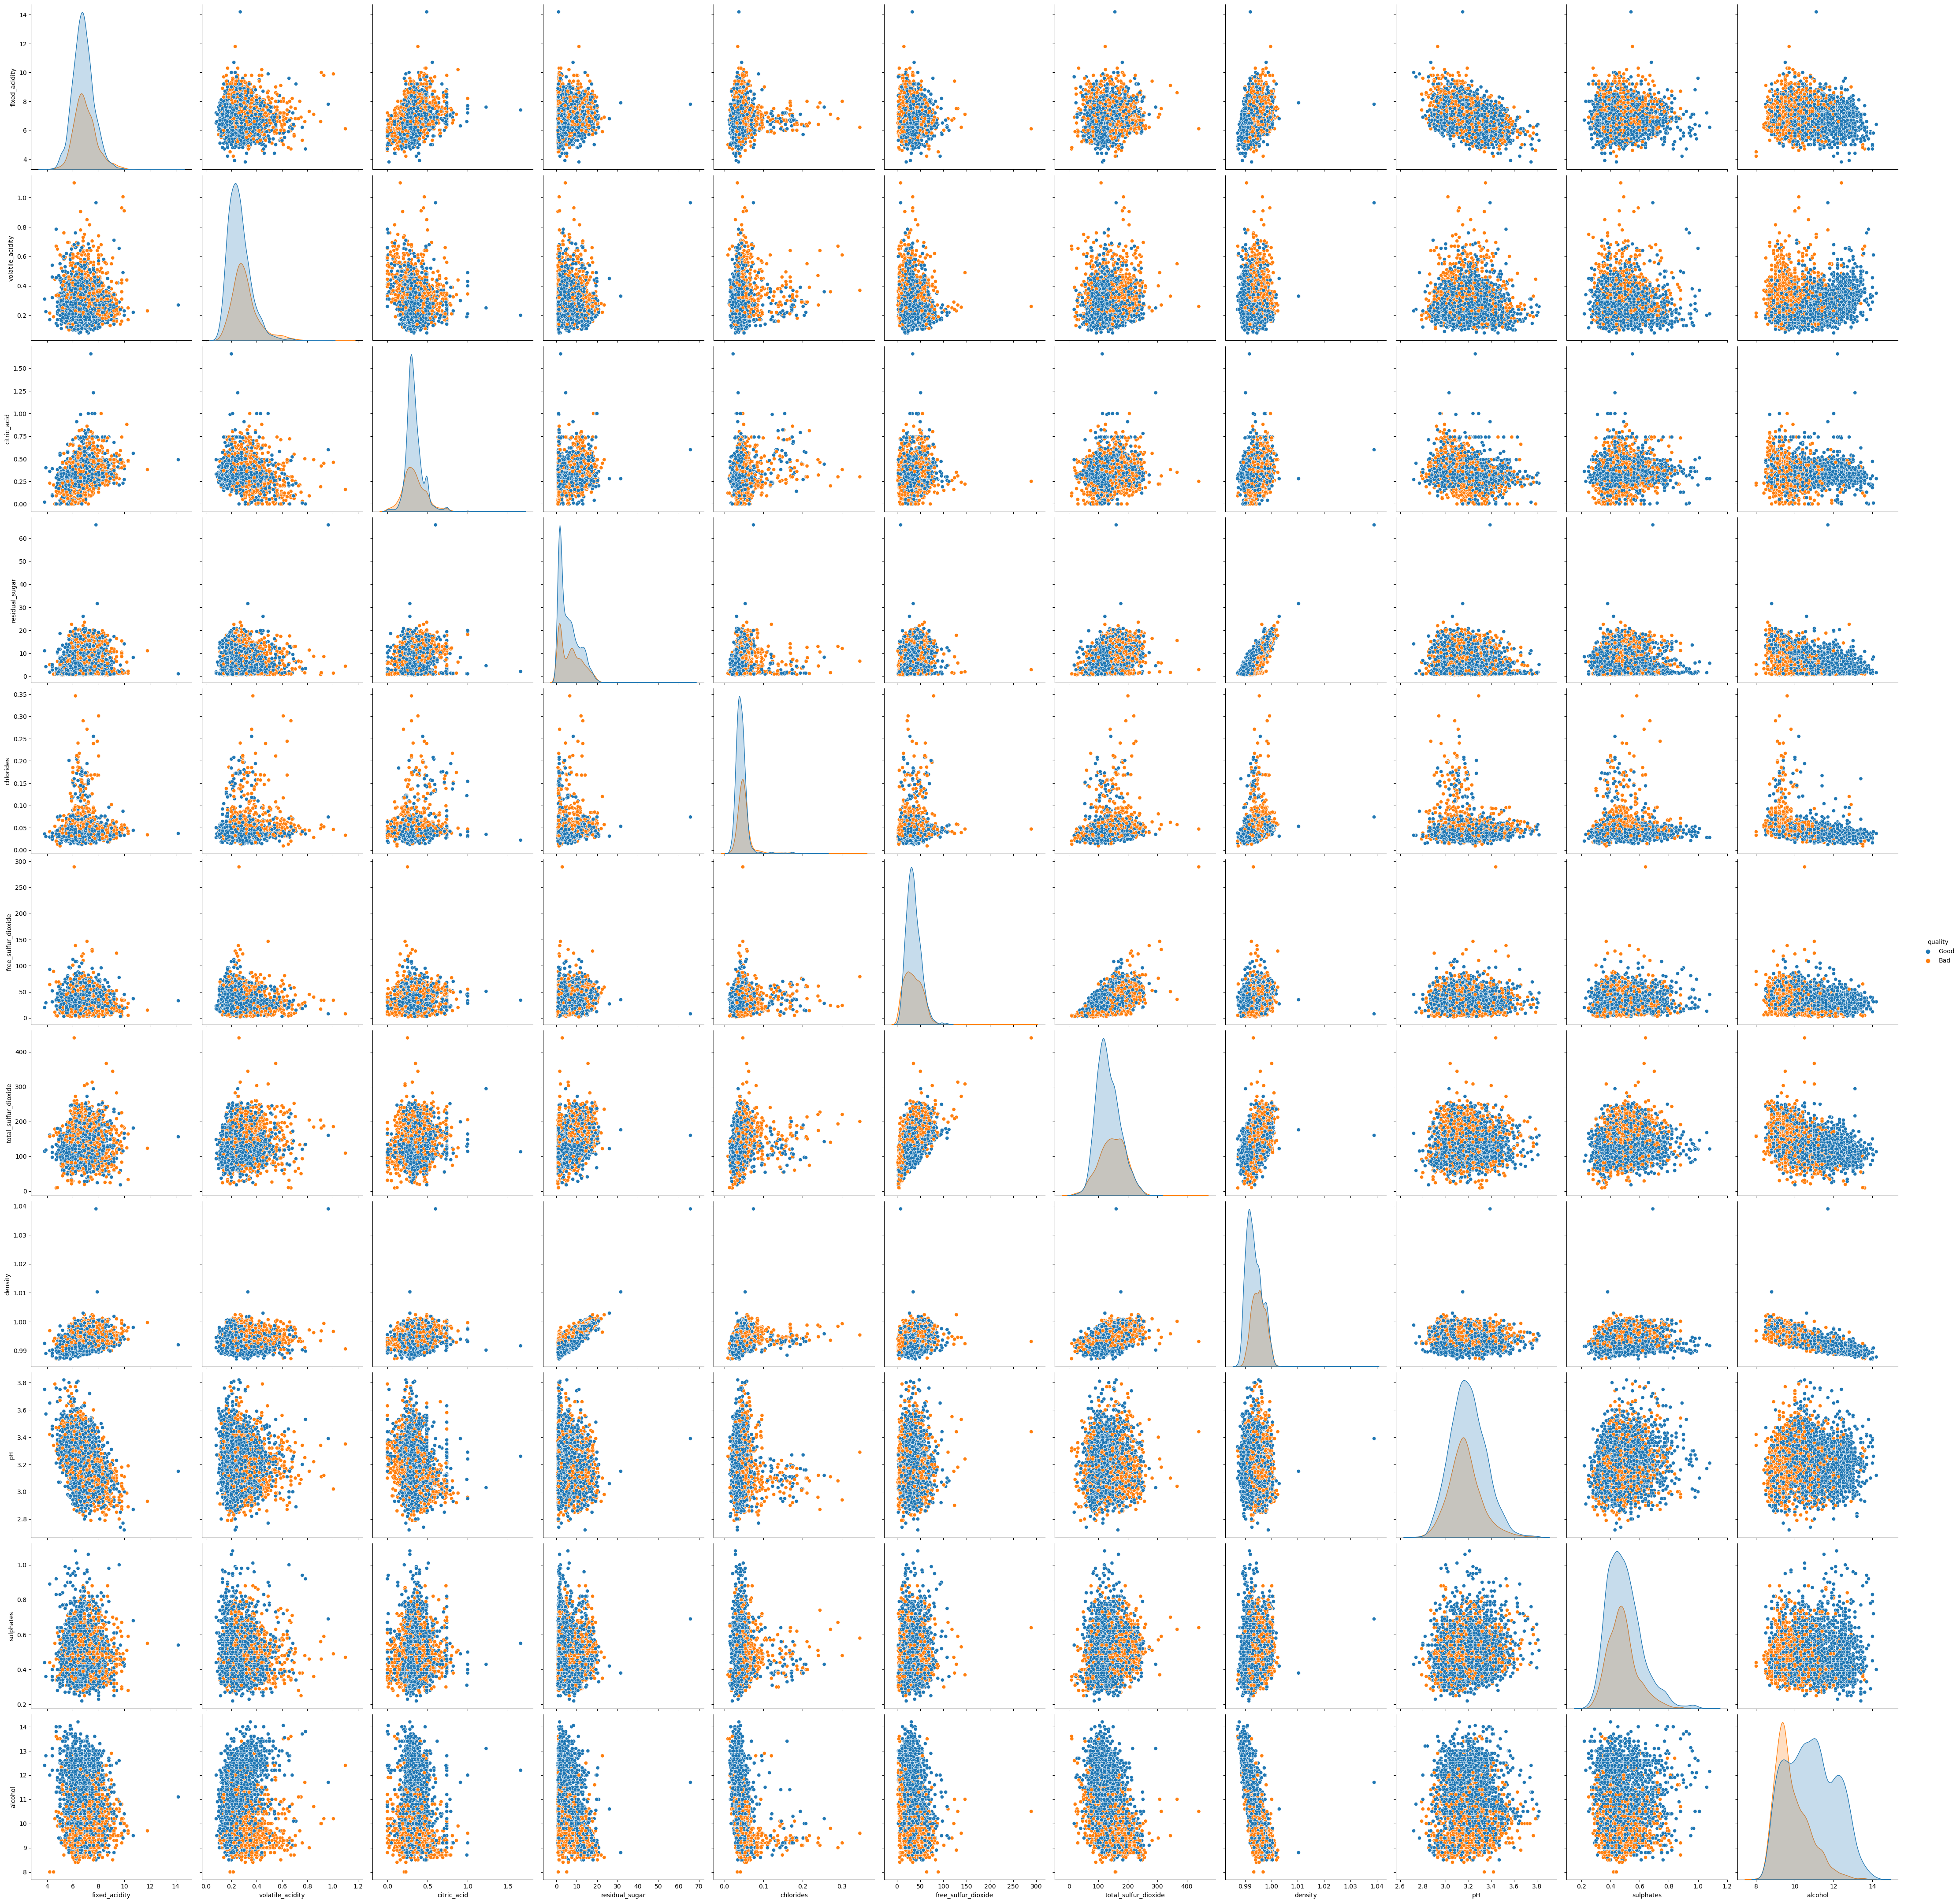

In [38]:
sns.pairplot(df_white, hue = 'quality', height = 4)
plt.show()

In [39]:
# Arrange data
X = df_white.drop('quality',axis='columns') 
y= df_white['quality']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=111) 

In [42]:
print(y.shape,y_train.shape, y_test.shape )

(4898,) (3428,) (1470,)


In [43]:
 print(X.shape,X_train.shape, X_test.shape )

(4898, 11) (3428, 11) (1470, 11)


In [44]:
Standard_scaler = preprocessing.StandardScaler()
X_train_scaled = Standard_scaler.fit_transform(X_train)
X_test_scaled = Standard_scaler.fit_transform(X_test)
X_train_scaled,X_test_scaled

(array([[-1.39021298,  1.24999793,  0.13116076, ..., -0.05224681,
          1.56289033,  1.53999827],
        [-0.18999385, -1.18008346,  1.291682  , ...,  2.84605793,
          2.77766453, -0.08375081],
        [ 0.65015954, -1.18008346,  1.291682  , ...,  0.277106  ,
         -0.17250138,  0.56574882],
        ...,
        [-1.27019106,  0.84498436,  1.37457638, ..., -0.57921131,
         -0.34604055, -0.65206299],
        [ 0.65015954, -0.16754955, -0.20041674, ...,  1.52864668,
          1.64965992,  0.0786241 ],
        [ 2.09042249,  0.3387174 , -0.28331111, ..., -1.56726974,
         -0.86665806, -0.32731317]]),
 array([[-0.39933248,  1.21441947, -0.77315238, ...,  1.68385733,
          0.36105875, -0.603117  ],
        [ 0.75281422, -0.02081345,  0.62177059, ...,  0.61027846,
         -0.35690725, -0.19570164],
        [-1.0906205 , -0.49590303, -0.28082663, ...,  0.61027846,
         -0.89538175, -0.92904928],
        ...,
        [ 2.48103428, -0.21084928,  0.04739054, ..., -

Logistics Regression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
y_pred = logmodel.predict(X_test_scaled)

In [46]:
 print('############# Logistic Reg ###############')
 print("Classification report:")
 print(classification_report(y_test, y_pred))
 print("Confusion matrix:")
 print(confusion_matrix(y_test, y_pred,labels=['Good', 'Bad']))
 print("Accuracy score:") 
print(accuracy_score(y_test, y_pred))

############# Logistic Reg ###############
Classification report:
              precision    recall  f1-score   support

         Bad       0.68      0.49      0.57       494
        Good       0.77      0.88      0.82       976

    accuracy                           0.75      1470
   macro avg       0.73      0.69      0.70      1470
weighted avg       0.74      0.75      0.74      1470

Confusion matrix:
[[860 116]
 [251 243]]
Accuracy score:
0.7503401360544217


Decision Tree

In [48]:
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test)

In [49]:
print('############# DT ###############')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=['Good', 'Bad']))
print(accuracy_score(y_test, y_pred))

############# DT ###############
              precision    recall  f1-score   support

         Bad       0.67      0.63      0.65       494
        Good       0.82      0.84      0.83       976

    accuracy                           0.77      1470
   macro avg       0.74      0.74      0.74      1470
weighted avg       0.77      0.77      0.77      1470

[[821 155]
 [182 312]]
0.7707482993197279


Random Forrest

In [50]:
RFclf=RandomForestClassifier(n_estimators=101)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

In [51]:
print('############# RF ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred,labels=['Good', 'Bad']))
print("Accuracy score:") 
print(accuracy_score(y_test, y_pred))

############# RF ###############
Classification report:
              precision    recall  f1-score   support

         Bad       0.77      0.67      0.72       494
        Good       0.84      0.90      0.87       976

    accuracy                           0.82      1470
   macro avg       0.81      0.79      0.80      1470
weighted avg       0.82      0.82      0.82      1470

Confusion matrix:
[[877  99]
 [161 333]]
Accuracy score:
0.8231292517006803


Support Vector Machine

In [52]:
SVclf = SVC(kernel='linear',probability=True, degree=3)
SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)

In [53]:
print('############# SVM ###############')
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred,labels=['Good', 'Bad']))
print("Accuracy score:") 
print(accuracy_score(y_test, y_pred))

############# SVM ###############
Classification report:
              precision    recall  f1-score   support

         Bad       0.70      0.46      0.56       494
        Good       0.77      0.90      0.83       976

    accuracy                           0.75      1470
   macro avg       0.73      0.68      0.69      1470
weighted avg       0.74      0.75      0.74      1470

Confusion matrix:
[[877  99]
 [265 229]]
Accuracy score:
0.7523809523809524


 The Accuracy score of the Random Forrest Model is .82 .So, It is the best model.

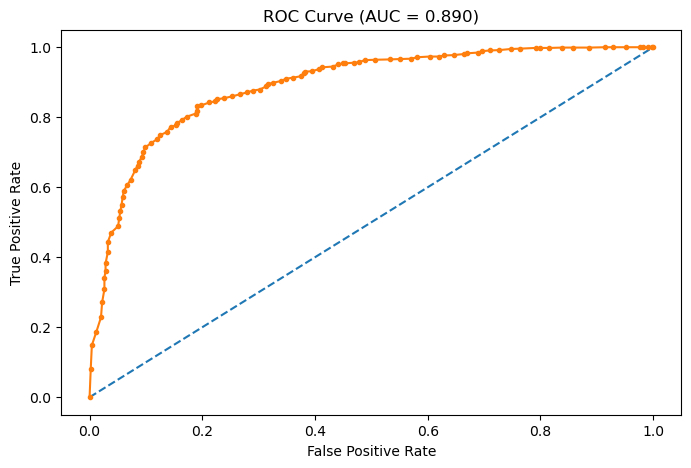

In [54]:
# Map 'Good' to 1 and 'Bad' to 0
y_test_ = y_test.map({'Good': 1, 'Bad': 0})
# Predict probabilities and get ROC curve
probs = RFclf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_, probs)
# Calculate AUC score
auc = roc_auc_score(y_test_, probs)
# Plot ROC curve
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

An ROC curve with an AUC (area under the curve) of 0.902 indicates that the binary classi er system has very good discrimination power.
 Speci cally, if the classi er is used to distinguish between positive and negative samples, it correctly ranks 90.2% of the positive samples
 higher than the negative samples, on average, across all possible threshold settings. An AUC value of 1.0 indicates a perfect classi er, while
 and AUC of 0.5 indicates a random classi er (no better than chance). An AUC value of 0.902 indicates that the classi er is able to accurately
 distinguish between positive and negative samples in the majority of cases, and can be considered to have excellent performance.

Feature Importances: [0.0640186  0.11535588 0.08052251 0.08153298 0.08353647 0.09797076
 0.08677217 0.11061118 0.07246298 0.06422548 0.14299099]


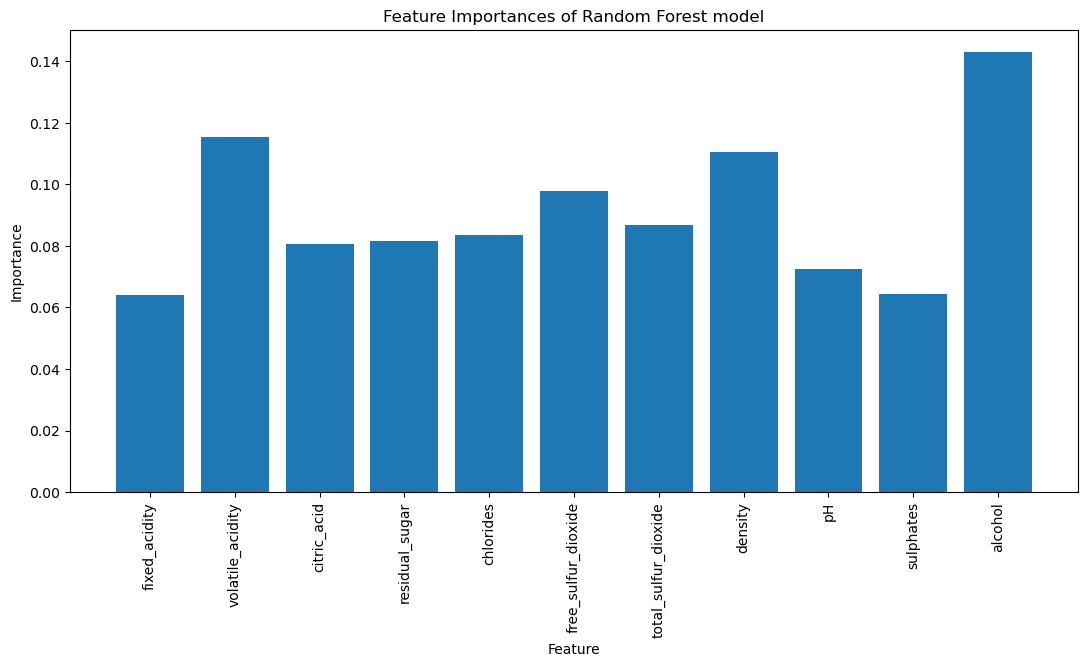

In [55]:
rf = RandomForestClassifier()
rf.fit(X, y)
# In this example, assume that we want to analyze the feature importances of the Random Forest model
importances = rf.feature_importances_
# You can print the feature importances to analyze the model
print('Feature Importances:', importances)
# You can also plot the feature importances to visualize their relative importance
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances of Random Forest model')
plt.show()

 The highest feature importance is 0.1417. So the Alcohol percentage has higher effect, while the lowest is 0.0638, SO, The sulphates has low
 effect. The sum of all the feature importances is approximately 1. This is usually the case for feature importances, as they are often normalized
 to add up to 1 for easier interpretation. In general, it's important to note that feature importances can be highly dependent on the speci c model
 and data being used. Therefore, it's often important to interpret these results in conjunction with other information about the model's
 performance and the speci c problem being addressed.

 
 **So, The alcohol Percentage, Density and Volatile_Acidity has signi cant effect on the wine quality**